In [2]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('Iris.csv') # 분석할 데이터 불러오기

In [4]:
X = df.iloc[:, :-1] # 독립변수 matrix

In [5]:
y = df.iloc[:, -1] # 종속변수 matrix

In [6]:
final_X = X
np.shape(final_X)

(150, 4)

In [7]:
# 종속변수 값 확인
np.unique(y)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
y = y.replace('setosa', 1) # 종속변수의 setosa를 1로 변환
y = y.replace('versicolor', 2) # 종속변수의 versicolor를 2로 변환
y = y.replace('virginica', 3) # 종속변수의 virginica를 3으로 변환

In [10]:
# CART (for classification) 함수 import
from sklearn.tree import DecisionTreeClassifier

In [11]:
# k-fold cross-validation 함수 import
from sklearn.model_selection import KFold

In [12]:
cv = KFold(n_splits = 5, shuffle = True) # 5-fold cv 함수 입력

In [13]:
cv.get_n_splits(final_X) # fold를 몇 개로 설정했는지 확인

5

In [14]:
# CART 함수 명명 및 parameter 입력
dtree = DecisionTreeClassifier(min_samples_leaf = 15, max_depth = 3)
# min_samples_leaf: 한 노드 당 최소 포함할 관측치 개수
# max_depth: 트리 growing할 최대 깊이

In [15]:
sp_tr_idx, sp_te_idx = list(cv.split(final_X))[2] # 3번째 cv의 training set과 test set

In [16]:
sp_X_train = final_X.iloc[sp_tr_idx] # cv로 찾은 training set index로 독립변수 training set 나누기
sp_X_test = final_X.iloc[sp_te_idx] # cv로 찾은 test set index로 독립변수 test set 나누기
sp_y_train = y[sp_tr_idx] # cv로 찾은 training set index로 종속변수 training set 나누기
sp_y_test = y[sp_te_idx] # cv로 찾은 test set index로 종속변수 test set 나누기

In [17]:
# scaling 함수 import
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # scaler 함수 명명
scaler.fit(sp_X_train) # scaler 함수 fitting
zs_X_train = scaler.transform(sp_X_train) # training set 데이터의 scaling

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# scaling 시 사용한 평균값(mean)과 표준편차(var의 제곱근)
scaler.mean_
scaler.var_ ** 0.5

array([5.80833333, 3.0375    , 3.70666667, 1.1875    ])

array([0.83661852, 0.43340945, 1.78067091, 0.77894828])

In [20]:
# CART 예측 모형 학습
dtree.fit(sp_X_train, sp_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
dtree.score(sp_X_train, sp_y_train) # training set의 R-squared 결과
dtree.score(sp_X_test, sp_y_test) # test set의 R-squared 결과

0.9583333333333334

0.9666666666666667

In [22]:
dtree.feature_importances_ # CART에서 사용된 독립변수 중요도

array([0.        , 0.00112407, 0.01361913, 0.9852568 ])

In [23]:
# min_samples_leaf의 parameter 설정
min_samples_leaf = np.array([10, 15, 20])

In [24]:
# max_depth의 parameter 설정
max_depth = np.array([2, 3, 5])

In [27]:
# parameter 조합 경우의 수
from itertools import product
list(product(min_samples_leaf, max_depth))

[(10, 2),
 (10, 3),
 (10, 5),
 (15, 2),
 (15, 3),
 (15, 5),
 (20, 2),
 (20, 3),
 (20, 5)]

In [28]:
# for 문 예시
list(product(min_samples_leaf, max_depth))[1]

(10, 3)

In [29]:
msl_value = np.array([10, 15, 20])
md_value = np.array([2, 3, 5])

In [30]:
# parameter 조합 경우의 수
pd_value = np.transpose([np.repeat(msl_value, len(md_value)), np.tile(md_value, len(msl_value))])
pd_value

array([[10,  2],
       [10,  3],
       [10,  5],
       [15,  2],
       [15,  3],
       [15,  5],
       [20,  2],
       [20,  3],
       [20,  5]])

In [ ]:
# numpy 내 repeat 함수 설명
np.repeat(msl_value, len(md_value))

In [ ]:
# numpy 내 tile 함수 설명
np.tile(md_value, len(msl_value))

In [31]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [32]:
# CART의 시각화를 위한 graphviz 함수 import
import graphviz 

In [33]:
# CART 분지 구조 저장
dot_data = tree.export_graphviz(clf, out_file=None) 

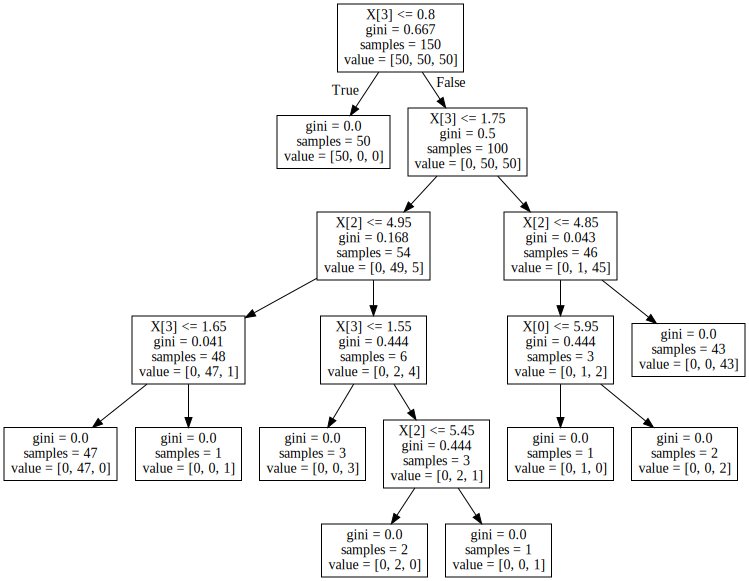

In [40]:
# CART 분지 구조를 통한 시각화
graph = graphviz.Source(dot_data)
graph

In [ ]:
# if there is an error.. have to install the graphviz package in your system
# sudo apt-get install graphviz

In [41]:
graph.render("iris")

'iris.pdf'

In [42]:
# CART 함수 명명 및 parameter 입력
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 15, max_depth = 3)
clf2 = clf2.fit(iris.data, iris.target)

In [43]:
# CART의 시각화를 위한 graphviz 함수 import
import graphviz
dot_data2 = tree.export_graphviz(clf2, out_file=None) # CART 분지 구조 저장

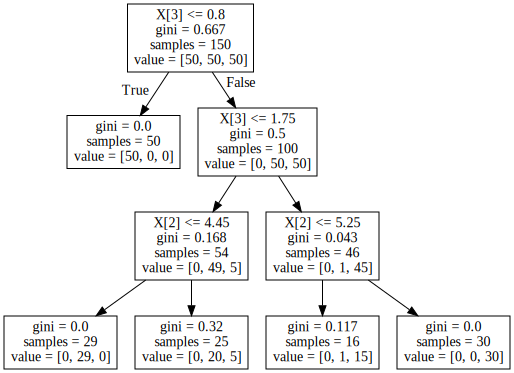

In [44]:
# CART 분지 구조를 통한 시각화
graph2 = graphviz.Source(dot_data2)
graph2